In [7]:
import pandas as pd

In [8]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

In [9]:
! ls

someFile.txt  Untitled.ipynb  veg.csv  yelp_db.sql  yelp_sql.tar


In [10]:
df = pd.read_csv('veg.csv', sep=';', header=None, names = ["rev_id", "stars", "date", "text", "useful", "funny", "cool", "name", "city", "state", "category"])

In [5]:
# !pip install seaborn

In [ ]:
df.head()

In [20]:
df.shape

(500, 12)

In [ ]:
df.info()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,500.0,4.036,1.244911,1.0,4.0,4.0,5.0,5.0
useful,500.0,1.268,2.202243,0.0,0.0,0.0,2.0,22.0
funny,500.0,0.380,1.336852,0.0,0.0,0.0,0.0,19.0
cool,500.0,0.580,1.528487,0.0,0.0,0.0,1.0,20.0


In [ ]:
d = df[df["useful"] > 2]

In [ ]:
d.iloc[8,:]

In [ ]:
d.iloc[8,:]['text']

In [22]:
df["Text_length"] = df["text"].apply(len)

In [23]:
df.head()

,rev_id,stars,date,text,useful,funny,cool,name,city,state,category,txt_len,Text_length
0,---3OXpexMp0oAg77xWfYA,5,2012-04-07 00:00:00,Pizza here made my night... Good people and gr...,2,0,0,Slice of Vegas,Las Vegas,NV,Vegan,108,108
1,--0RrdW5mtHa-Oeyzy4RjQ,5,2016-07-29 00:00:00,Wow! This place is awesome. Everyone is so nic...,0,0,0,Raw Organic Juice Bar,Chandler,AZ,Vegan,280,280
2,--1Uj2FGirXqBmi_oA6-qg,5,2014-07-13 00:00:00,Outstanding food and service. \n\nThe atmosphe...,3,0,0,Vegetarian Haven,Toronto,ON,Vegan,923,923
3,--c6GUtseZhMHA0rSfnN8w,5,2015-09-30 00:00:00,"This was our second, but certainly not our las...",1,0,1,Nandini Indian Cuisine,Tempe,AZ,Vegan,304,304
4,--DiZOzXn1uAPpdom4Hqhw,5,2013-06-13 00:00:00,Absolutely perfect. Free wifi great coffee and...,0,0,0,Smelly Cat Coffee,Charlotte,NC,Vegan,64,64


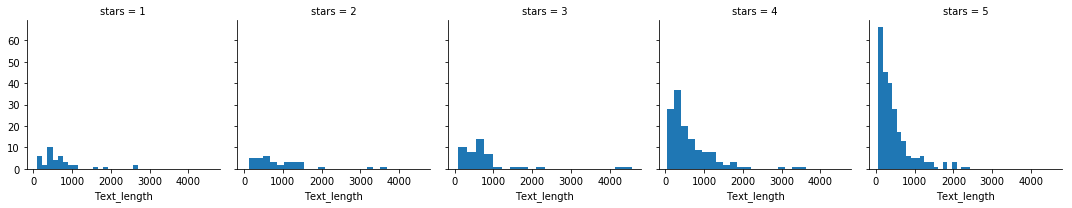

In [25]:
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist, 'Text_length', bins=20);

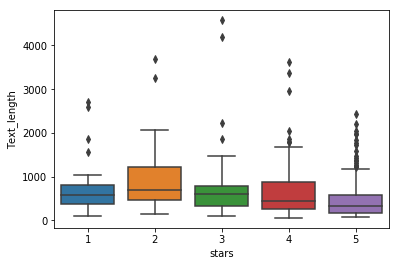

In [27]:
sns.boxplot(x='stars', y='Text_length', data=df);

In [35]:
df.groupby('stars').size()

stars
1     39
2     33
3     45
4    137
5    246
dtype: int64

In [36]:
stars = df.groupby('stars').mean()
stars.corr()

,useful,funny,cool,txt_len,Text_length
useful,1.000000,0.936670,-0.724838,0.593754,0.593754
funny,0.936670,1.000000,-0.595356,0.773462,0.773462
cool,-0.724838,-0.595356,1.000000,-0.563306,-0.563306
txt_len,0.593754,0.773462,-0.563306,1.000000,1.000000
Text_length,0.593754,0.773462,-0.563306,1.000000,1.000000


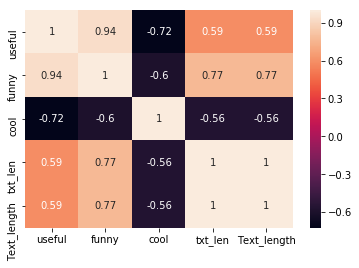

In [39]:
sns.heatmap(data=stars.corr(), annot=True);

In [44]:
# !pip install sklearn

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform

In [46]:
vectorizer = TfidfVectorizer(stop_words='english')

In [47]:
aX = vectorizer.fit(df['text'])

In [50]:
X = aX.transform(df['text'])

In [53]:
features = vectorizer.get_feature_names()
features

['00',
 '10',
 '100',
 '1000',
 '107',
 '10am',
 '10mins',
 '10p',
 '10th',
 '11',
 '11am',
 '12',
 '125',
 '12hr',
 '13',
 '14',
 '15',
 '16',
 '16oz',
 '17',
 '18',
 '19',
 '1980',
 '1p',
 '1st',
 '20',
 '2015',
 '2017',
 '21',
 '215',
 '22',
 '23',
 '24th',
 '25',
 '27',
 '29',
 '2am',
 '2nd',
 '2x',
 '30',
 '30am',
 '35',
 '38',
 '3pm',
 '3rd',
 '40',
 '40am',
 '42',
 '45',
 '473',
 '49',
 '4th',
 '50',
 '60',
 '62',
 '65',
 '68',
 '74',
 '7am',
 '7pm',
 '80s',
 '845pm',
 '85',
 '86',
 '8am',
 '8pm',
 '90',
 '930am',
 '95',
 '99',
 '9pm',
 'abbreviated',
 'abdul',
 'ability',
 'able',
 'abruptly',
 'absolument',
 'absolute',
 'absolutely',
 'abt',
 'acai',
 'acceptable',
 'accepts',
 'access',
 'accessible',
 'accidentally',
 'accommodate',
 'accommodated',
 'accommodating',
 'accomodate',
 'accompagnent',
 'accompanied',
 'accompaniment',
 'accompany',
 'accord',
 'according',
 'account',
 'accounting',
 'accrochées',
 'accueillir',
 'achieve',
 'acidic',
 'acknowledge',
 'acknowl

In [54]:
len(features)

5167

In [56]:
from sklearn.cluster import KMeans

In [57]:
kmeans = KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
# 2. Print out the centroids.
print("\n2) cluster centers:")
print(kmeans.cluster_centers_)


2) cluster centers:
[[0.00175896 0.00323031 0.00091857 ... 0.         0.         0.        ]
 [0.00757316 0.01207033 0.00147918 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00625463 0.         ... 0.00288231 0.         0.00288231]
 [0.00188304 0.01565433 0.00343662 ... 0.         0.         0.        ]
 [0.         0.00203492 0.00405916 ... 0.         0.         0.        ]]


In [61]:
# 3. Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:\n")
for num, centroid in enumerate(top_centroids):
        print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))


3) top features (words) for each cluster:

0: vegan, good, really, chocolate, food, like, place, great, bowl, just
1: food, said, place, good, manager, order, really, like, customer, free
2: great, food, lunch, love, favorite, place, spot, fresh, awesome, disappointed
3: good, food, coffee, highly, yummy, excellent, fresh, place, vegan, hot
4: great, food, place, friendly, sure, service, table, make, good, staff
5: pizza, thai, flavors, great, food, toppings, place, best, good, night
6: food, great, place, ordered, good, chicken, service, just, amazing, right
7: vegan, vegetarian, time, menu, restaurant, food, love, place, ve, delicious
